In [4]:
import warnings

warnings.filterwarnings('ignore')
from torch import nn
import torch 
from torch.utils.data import DataLoader, Dataset
from torch.nn import functional as F
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


C:\Users\shashan3\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


#### Load data and map it to torch data

In [5]:
#load data
df =pd.read_csv("../Data/iris.csv")
X = df.drop("target",axis =1).values
y = df["target"].values

#create test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Map the data into tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train= torch.LongTensor(y_train)
y_test= torch.LongTensor(y_test)

#prepare Dataloader
train_loader = DataLoader (X_train, batch_size=60, shuffle=True)
test_loader = DataLoader(X_test, batch_size=60, shuffle=False)

### Create a model
Since we have multiclass classification problem we should have atleast one hidden unit 

We will use <strong>ReLU</strong> as activation function that is available at torch.nn.ReLU or torch.nn.functional.relu

In [6]:
#model defination
class Model(nn.Module):
    def __init__(self, input_feature=4, h1=8,h2=9,out_feature=3):
        super().__init__()
        self.input_layer = nn.Linear(input_feature,h1)
        self.hidden      = nn.Linear(h1,h2)
        self.out         = nn.Linear(h2,out_feature)
        
    def forward(self,x):
        x = F.relu(self.input_layer(x))
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

Define the Loss and optimizer

we will take crossentropy as loss function and Adam as optimizer

In [7]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=.01)

In [8]:
#define number of epochs
epochs = 100
losses = []
for epoch in range(epochs):
    #make prediction with current model weights
    y_pred = model.forward(X_train)
    #calculate loss
    loss = criterion(y_pred,y_train)
    #append the loss in losses list to plot later
    losses.append(loss)
    
    #clear the previous accumulated gradients
    optimizer.zero_grad()
    
    #backprop on the loss
    loss.backward()
    
    #update the weights
    optimizer.step()
    print(f"Epoch {str(epoch):2}, loss: {loss.item():10.8f}")
    

Epoch 0 , loss: 1.10349536
Epoch 1 , loss: 1.08320427
Epoch 2 , loss: 1.06927633
Epoch 3 , loss: 1.05434716
Epoch 4 , loss: 1.03764009
Epoch 5 , loss: 1.01975071
Epoch 6 , loss: 1.00088382
Epoch 7 , loss: 0.98227674
Epoch 8 , loss: 0.96358544
Epoch 9 , loss: 0.94425154
Epoch 10, loss: 0.92423338
Epoch 11, loss: 0.90318549
Epoch 12, loss: 0.88074523
Epoch 13, loss: 0.85723305
Epoch 14, loss: 0.83505934
Epoch 15, loss: 0.81548500
Epoch 16, loss: 0.79907095
Epoch 17, loss: 0.78243983
Epoch 18, loss: 0.76597899
Epoch 19, loss: 0.74923456
Epoch 20, loss: 0.73203880
Epoch 21, loss: 0.71450371
Epoch 22, loss: 0.69697815
Epoch 23, loss: 0.67960685
Epoch 24, loss: 0.66198295
Epoch 25, loss: 0.64397216
Epoch 26, loss: 0.62559891
Epoch 27, loss: 0.60680270
Epoch 28, loss: 0.58751953
Epoch 29, loss: 0.56810707
Epoch 30, loss: 0.54872769
Epoch 31, loss: 0.52957362
Epoch 32, loss: 0.51092088
Epoch 33, loss: 0.49290231
Epoch 34, loss: 0.47550082
Epoch 35, loss: 0.45873979
Epoch 36, loss: 0.44264072
E

plot the loss function

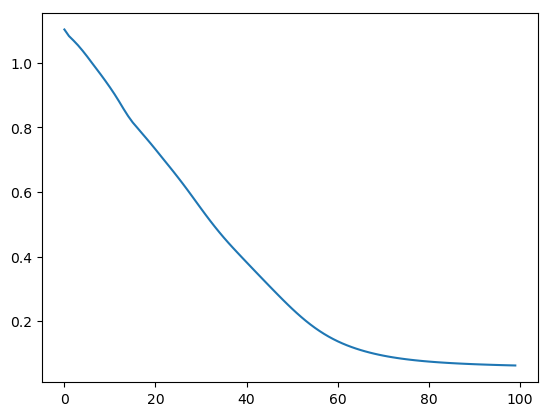

In [9]:
plt.plot(range(epochs),losses)

validate model

In [10]:
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val,y_test)
print(f'{loss:.3f}')

0.056


In [11]:
correct =0
print(f"Actual Predicted")
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
#         print(f'{(y_test[i])}   {y_val.argmax().item():5}')
        if (y_val.argmax().item() == y_test[i]):
            correct+=1
print(f'{correct/len(y_test)}% correct')

Actual Predicted
0.98% correct


save the model

In [12]:
model.eval()
for i in model.parameters():
    print(i)

Parameter containing:
tensor([[ 0.0809, -0.6593,  0.9702,  0.9609],
        [-0.3954, -0.3450, -0.4221,  0.3916],
        [ 0.7211,  0.6032,  0.5088, -0.0168],
        [-0.4772,  0.0170, -0.0337, -0.0155],
        [ 0.0976, -0.4221, -0.4198, -0.0320],
        [ 0.9608,  0.2918, -0.7883, -0.8799],
        [ 0.1803, -0.6689,  0.8295,  1.1147],
        [-0.1375, -0.3483, -0.1008, -0.2111]], requires_grad=True)
Parameter containing:
tensor([-0.3954, -0.3751,  0.7389,  0.3157, -0.3002,  1.1680, -0.1944, -0.2043],
       requires_grad=True)
Parameter containing:
tensor([[-0.3855, -0.1811,  0.6827, -0.2402, -0.2527,  0.5280, -0.3966, -0.0751],
        [-0.1907,  0.2242, -0.0826,  0.2905,  0.1612, -0.3222,  0.1494,  0.1982],
        [ 0.4662, -0.3212,  0.3077, -0.1807,  0.3431, -0.3562,  0.6775,  0.1006],
        [ 0.1218, -0.0132,  0.0640, -0.0612, -0.1874, -0.2378, -0.1340,  0.0978],
        [-0.1285, -0.0398, -0.1128,  0.1885, -0.1264, -0.0523, -0.3015,  0.2527],
        [-0.1633, -0.1745, 

In [13]:
new_model = Model()
new_model.eval()
for i in new_model.parameters():
    print(i)

Parameter containing:
tensor([[-0.0343,  0.2071, -0.1839,  0.0323],
        [ 0.1895, -0.0561, -0.3418, -0.4337],
        [-0.2372, -0.1995,  0.1135, -0.0096],
        [-0.3415,  0.3719,  0.1733,  0.1971],
        [ 0.0806, -0.1228, -0.3968,  0.2070],
        [ 0.0433, -0.2886,  0.1269,  0.2600],
        [-0.3701,  0.2552,  0.3245, -0.3818],
        [-0.1385, -0.3516,  0.1010,  0.0242]], requires_grad=True)
Parameter containing:
tensor([-0.3055, -0.0411, -0.2708,  0.0314,  0.3590,  0.0468,  0.0650, -0.2470],
       requires_grad=True)
Parameter containing:
tensor([[-7.9181e-02, -1.8687e-01,  8.2436e-02,  1.7928e-01,  2.7865e-01,
         -9.7990e-05, -5.7424e-02, -6.6175e-02],
        [-6.9486e-03, -2.9076e-01,  2.5778e-01,  1.6030e-01, -5.4176e-02,
         -1.5177e-01,  2.3221e-01,  1.8736e-01],
        [ 2.3010e-01,  3.3365e-01, -1.2667e-01,  2.9351e-01,  2.6114e-03,
         -2.3340e-01, -2.8741e-01, -1.4192e-01],
        [-3.3446e-01, -1.8964e-01,  9.5196e-02, -4.4884e-02,  9.0398

In [14]:
torch.save(model,"irisClassifier")

In [15]:
import torch
model_loaded = torch.load("irisClassifier")

In [16]:
model_loaded.eval()

Model(
  (input_layer): Linear(in_features=4, out_features=8, bias=True)
  (hidden): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [17]:
correct =0
print(f"Actual Predicted")
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model_loaded.forward(data)
#         print(f'{(y_test[i])}   {y_val.argmax().item():5}')
        if (y_val.argmax().item() == y_test[i]):
            correct+=1
print(f'{correct/len(y_test)}% correct')

Actual Predicted
0.98% correct


In [18]:
model


Model(
  (input_layer): Linear(in_features=4, out_features=8, bias=True)
  (hidden): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)